## Méthode de Monte Carlo

Le but est de présenter les possibilités interactives de matplotlib notamment dans les notebooks 

In [1]:
from random import random
from math import sqrt

def MonteCarlo(nbrpoints):
    compteur=0
    for i in range(nbrpoints):
        x=random()
        y=random()
        distance=sqrt(x**2+y**2)
        if (distance<1):
            compteur=compteur+1
    return compteur/nbrpoints


In [2]:
# convergence très faible, ne pas dépasser les dizaines de millions
print("Une valeur approchée de pi est ",4*MonteCarlo(10000000))

Une valeur approchée de pi est  3.140464


<div class="alert" style="background-color: #f4ecf7;border-left:1px solid #a569bd  ">
    
Principe on donne en paramètre le nom de la fonction et la plage pour chacun des paramètres

`@interact` est un décorateur qui se nomme interact, afin de modifier la fonction: ici elle englobe notre fonction afin de rendre notre fonction interactive.
</div>

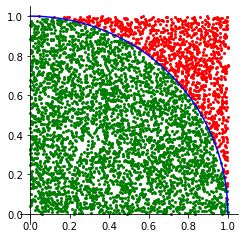

In [3]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np

@interact(n_points=(0,10000, 500))
def monte_carlo(n_points):
    # Définition de 4 listes pour les coordonnées des points intérieurs et extérieurs
    interieur = 0
    xin, yin, xout, yout = [[] for _ in range(4)] 

    for _ in range(n_points):
        x = random()
        y = random()
        if x**2+y**2 <= 1:
            interieur += 1
            xin.append(x)
            yin.append(y)
        else:
            xout.append(x)
            yout.append(y)

    #print ("Une estimation de pi est pour N = %d is %.4f" %(n_points, 4*interieur/n_points))
    
    x = np.linspace(0,1,1000)
    y = np.sqrt(1-x**2)
    
    fig, graph = plt.subplots()
    graph.set_aspect('equal') # repère orthonormé
    graph.spines['left'].set_position('zero')          
    graph.spines['right'].set_color('none')
    graph.spines['bottom'].set_position('zero')
    graph.spines['top'].set_color('none')
    graph.scatter(xin, yin, color='g', marker='o', s=4)
    graph.scatter(xout, yout, color='r', marker='o', s=4)
    graph.plot(x,y,color='b')
    plt.show()


## Illustration pour une activité - Hyperbole -terminale p??

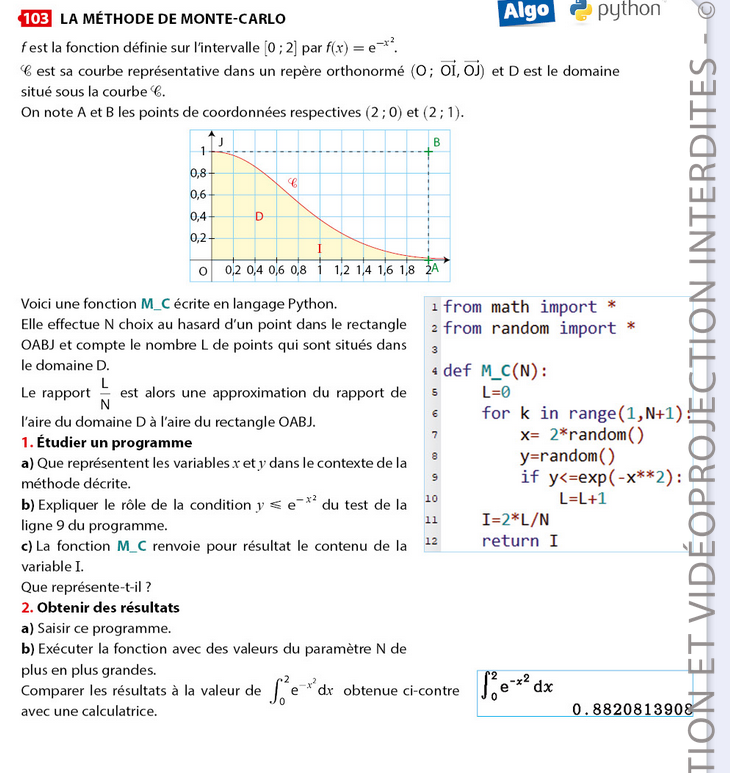

<div class="alert"  style="background-color:#e6ffe6;border-left:2px solid #009682">

$f$ est la fonction définie sur l'intervalle $[0;2]$ par $f(x)=e^{-x^2}$

$C$ est sa courbe dans un repère orthonormé $(0;I;J)$ et $D$ le domaine situé sous la courbe et compris dans le rectangle OJBA avec $A(2;0)$ et $B(2;1)$.

 </div>

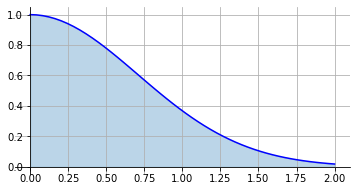

In [4]:
from matplotlib import pyplot as plt
from random import random
from numpy import linspace,exp


def representation():
    x=linspace(0,2,50)
    y=exp(-x**2)


    fig =  plt.figure()
    graph =  fig.add_subplot(1,1,1)
    graph.spines['left'].set_position('zero')          
    graph.spines['right'].set_color('none')
    graph.spines['bottom'].set_position('zero')
    graph.spines['top'].set_color('none')
    graph.set_aspect('equal') #important
    plt.grid()
    plt.plot(x,y,'b')
    graph.fill_between(x,y, color='C0', alpha=0.3)
    plt.show()

representation()

In [5]:
def appartient_D(x,y):
    ''' permet d'adapter facilement les fonction suivantes'''
    return y <= exp(-x**2)

def illustration(N,courbe=True):
    L = 0
    xin, yin, xout, yout = [[] for _ in range(4)] 

    for _ in range(N):
        x = 2*random()
        y = random()
        if appartient_D(x,y):
            L += 1
            xin.append(x)
            yin.append(y)
        else:
            xout.append(x)
            yout.append(y)
        
    x=linspace(0,2,50)
    y=exp(-x**2)


    fig =  plt.figure()
    graph =  fig.add_subplot(1,1,1)
    graph.spines['left'].set_position('zero')          
    graph.spines['right'].set_color('none')
    graph.spines['bottom'].set_position('zero')
    graph.spines['top'].set_color('none')
    graph.set_aspect('equal') #important
    plt.grid()
    if courbe:
        plt.plot(x,y,'b')
        graph.fill_between(x,y, color='C0', alpha=0.3)
    graph.scatter(xin, yin, color='g', marker='o', s=4)
    graph.scatter(xout, yout, color='r', marker='o', s=4)
    plt.show()
    return 2*L/N


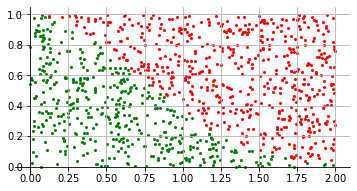

In [6]:
L=illustration(1000,False)

<div class="alert" style="background-color: #f4ecf7;border-left:1px solid #a569bd  ">
    
On pourrait procéder comme précedemment, mais comme j'aimerais afficher un minimum de points, il me faut utiliser widgets. L'exemple est parlant:

Pour davantage d'informations 
[https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)

</div>

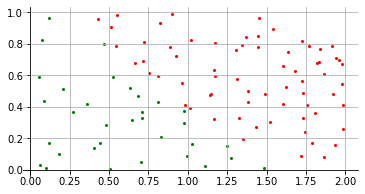

0.66

In [7]:
# Une autre manière de rendre le graphique interactif
from ipywidgets import interact,widgets

interact(illustration, N=widgets.IntSlider(min= 0, max=7000, step=400, value=100),courbe=False);



In [10]:
import ipywidgets
ipywidgets.__version__

'6.0.0'